# Deep Learning - Recurrent Neural Networks

Implementation of a simple LSTM network that tries to estimate the google stock prices given a sequence of data. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## 1. Import your datasets train and test 

In [2]:
train = pd.read_csv('trainset.csv')
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [3]:
test = pd.read_csv('testset.csv')
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


## 2. Separate your open column and store it in a variable. 
Training can only be done on numpy arrays, therefore we have to transform the dataframe into a numpy array.

In [4]:
# Seperating the col and changing it to a numpy array and resizing it 
training = train['Open'].to_numpy().reshape(-1, 1) 
type(training)

numpy.ndarray

## 3. Use a MaxMinScaler and scale your data to a range of 0-1.

In [5]:
# import
from sklearn.preprocessing import MinMaxScaler

# initialize 
scaler = MinMaxScaler(feature_range=(0,1))

# Scale the data
training_scaled = scaler.fit_transform(training)
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

## 4. Create empty arrays for x, y of train and test set. 
We will use windows of 60 timestaps to predict the 61st sample. Use a for loop, that ranges to length of training or testing file. Every 60 sample, append to your training set. 
Keep in mind that labels: 

        x_train.append(training_scaled[i-60:i, 0])
        y_train.append(training_scaled[i,0])

In [6]:
x_train = []
y_train = []

In [7]:
for i in range(60, len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

## 5. reshape your data such that it has space for another set of features. 

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1199, 60, 1)

**Training and testing files should be ready**  

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## 6. Create a regressor model that has the following structure. 
![image.png](attachment:image.png)

In [11]:
model = Sequential()

In [12]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))

In [13]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [14]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

## 7. Compile your model using the adam optimizer and set your losses for 'mean_squared_error'. and fit your data with 75 epochs.

In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [16]:
model.fit(x_train, y_train, epochs = 75)

Epoch 1/75
38/38 [==============================] - 13s 136ms/step - loss: 0.0242
Epoch 2/75
38/38 [==============================] - 5s 132ms/step - loss: 0.0047
Epoch 3/75
38/38 [==============================] - 5s 137ms/step - loss: 0.0038
Epoch 4/75
38/38 [==============================] - 5s 136ms/step - loss: 0.0035
Epoch 5/75
38/38 [==============================] - 5s 133ms/step - loss: 0.0035
Epoch 6/75
38/38 [==============================] - 5s 132ms/step - loss: 0.0036
Epoch 7/75
38/38 [==============================] - 5s 134ms/step - loss: 0.0036
Epoch 8/75
38/38 [==============================] - 5s 135ms/step - loss: 0.0034
Epoch 9/75
38/38 [==============================] - 5s 135ms/step - loss: 0.0036
Epoch 10/75
38/38 [==============================] - 5s 135ms/step - loss: 0.0033
Epoch 11/75
38/38 [==============================] - 5s 135ms/step - loss: 0.0031
Epoch 12/75
38/38 [==============================] - 5s 134ms/step - loss: 0.0034
Epoch 13/75
38/38 [=====

## 8. Concatenate your train['open'] and test['open'] with axis =0. 


In [17]:
testing = test['Open'].to_numpy().reshape(-1, 1)

In [18]:
concat_open = pd.concat((test['Open'], train['Open']), axis=0)

## 9. Make sure your inputs start from index 60. reshape them into a single column and apply the scaler transform. 

In [19]:
inputs = concat_open[1259 - 60:].to_numpy().reshape(-1, 1)

In [20]:
inputs = scaler.fit_transform(inputs)
inputs

array([[2.38087022e-02],
       [1.36613992e-02],
       [1.09765446e-02],
       [0.00000000e+00],
       [8.29241658e-04],
       [1.21610041e-02],
       [4.85252104e-02],
       [7.05175819e-02],
       [7.70324643e-02],
       [8.27181090e-02],
       [1.15568460e-01],
       [1.70055728e-01],
       [2.06498976e-01],
       [2.04011496e-01],
       [3.50337564e-01],
       [3.15908012e-01],
       [3.46231360e-01],
       [3.66920707e-01],
       [4.11181866e-01],
       [4.40675972e-01],
       [4.11379237e-01],
       [4.54140001e-01],
       [4.34516545e-01],
       [4.08220599e-01],
       [4.32739978e-01],
       [4.38346576e-01],
       [4.66182440e-01],
       [4.49085991e-01],
       [3.91163673e-01],
       [4.32502847e-01],
       [4.46440659e-01],
       [4.97453354e-01],
       [5.17432024e-01],
       [5.34607519e-01],
       [5.83448665e-01],
       [5.85857107e-01],
       [6.04453952e-01],
       [5.80487398e-01],
       [5.82501099e-01],
       [6.10494810e-01],


## 10. Refer to step 4, if you have completed it for x_test move to step 11, else append your data in x_test in the same way. 

In [21]:
x_test = []

In [22]:
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])

## 11. Convert to a numpy array and reshape similar to step 5.

In [23]:
x_test = np.array(x_test)

In [24]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
x_test.shape

(125, 60, 1)

## 12. Predict your results and plot them against the real values.

In [26]:
pred = model.predict(x_test)

In [27]:
# undo the transformation by inverse-transforming since we need it in the original form
pred = scaler.inverse_transform(pred)

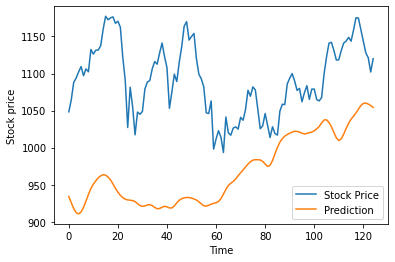

In [28]:
plt.plot(testing, label='Stock Price')
plt.plot(pred, label='Prediction')

plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()